In [2]:
import mediapipe as mp
import cv2
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.misc import derivative
from scipy.signal import find_peaks
from statistics import stdev,mean
import itertools as itr
import math
import pprint, pickle


# Static Parameters

In [3]:
def lenght(x1,x2,y1,y2,z1,z2):
    output=(math.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2))
    return output
def upper_body(x11,x12,x23,x24,y11,y12,y23,y24,z11,z12,z23,z24):
    output=math.sqrt((((x11+x12)/2)-((x23+x24)/2))**2+(((y11+y12)/2)-((y23+y24)/2))**2+(((z11+z12)/2)-((z23+z24)/2))**2)
    return output
def thigh_r(k):
    l_xy=lenght(key_array[k][24][0],key_array[k][26][0],key_array[k][24][1],key_array[k][26][1],0,0)
    return l_xy
def thigh_l(k):
    l_xy=lenght(key_array[k][23][0],key_array[k][25][0],key_array[k][23][1],key_array[k][25][1],0,0)
    return l_xy
def shank_r(k):
    l_xy=lenght(key_array[k][28][0],key_array[k][26][0],key_array[k][26][1],key_array[k][28][1],0,0)
    return l_xy
def shank_l(k):
    l_xy=lenght(key_array[k][27][0],key_array[k][25][0],key_array[k][27][1],key_array[k][25][1],0,0)
    return l_xy
def ankle_to_heel_r(k):
    l_xy=lenght(key_array[k][28][0],key_array[k][30][0],key_array[k][28][1],key_array[k][30][1],0,0)
    return l_xy
def ankle_to_heel_l(k):
    l_xy=lenght(key_array[k][27][0],key_array[k][29][0],key_array[k][27][1],key_array[k][29][1],0,0)
    return l_xy
def upper_arm_r(k):
    l_xy=lenght(key_array[k][12][0],key_array[k][14][0],key_array[k][12][1],key_array[k][14][1],0,0)
    return l_xy
def upper_arm_l(k):
    l_xy=lenght(key_array[k][11][0],key_array[k][13][0],key_array[k][11][1],key_array[k][13][1],0,0)
    return l_xy
def lower_arm_r(k):
    l_xy=lenght(key_array[k][16][0],key_array[k][14][0],key_array[k][16][1],key_array[k][14][1],0,0)
    return l_xy
def lower_arm_l(k):
    l_xy=lenght(key_array[k][15][0],key_array[k][13][0],key_array[k][15][1],key_array[k][13][1],0,0)
    return l_xy
def palm_to_finger_r(k):
    l_xy=lenght(key_array[k][16][0],key_array[k][20][0],key_array[k][16][1],key_array[k][20][1],0,0)
    return l_xy
def palm_to_finger_l(k):
    l_xy=lenght(key_array[k][15][0],key_array[k][19][0],key_array[k][15][1],key_array[k][19][1],0,0)
    return l_xy
def foot_length_r(k):
    l_xy=lenght(key_array[k][30][0],key_array[k][32][0],key_array[k][30][1],key_array[k][32][1],0,0)
    return l_xy
def foot_length_l(k):
    l_xy=lenght(key_array[k][29][0],key_array[k][31][0],key_array[k][29][1],key_array[k][31][1],0,0)
    return l_xy
def ubl(k):
    l_xy=upper_body(key_array[k][11][0],key_array[k][12][0],key_array[k][23][0],key_array[k][24][0],key_array[k][11][1],key_array[k][12][1],key_array[k][23][1],key_array[k][24][1],0,0,0,0)
    return l_xy
def center(k):
    cent=(key_array[k][11][0]+key_array[k][12][0]+key_array[k][23][0]+key_array[k][24][0])/4
    return cent
def max_avg(s1,s2,y_data):
    pk = np.array(y_data[peaks])
    avg = []
    for i in range(s1,(s2+1)):
        avg.append(pk[i])
    max_avg = sum(avg)/len(avg)
    return max_avg
def com(A,B):
    if type(A)==np.ndarray:
        C= A.tolist()
    else:
        C=A
    for i,v in enumerate(B):
        C.insert(2*i+1,v) 
    return C
def sample(df,y,time_return_points):
    a = np.array(df.t)
    sample_data=[]
    for i in range(len(time_return_points)-1):
        index=np.where(np.logical_and(a>=time_return_points.t[i], a<=time_return_points.t[i+1]))
        s = list(map(lambda a : y[a], index[0]))
        sample_data.append(s)
    return sample_data
def avrg_value(direction_lis,a,b):
    li=[]
    for k in range(len(direction_lis)):
        df = pd.DataFrame(direction_lis[k],columns=['xy'])
        min_thresold,max_thresold=df.xy.quantile([a,b])
        real_set=df.xy[(df.xy>min_thresold)&(df.xy<max_thresold)]
        avre=real_set.mean()
        li.append(avre)
    return (li)
def comb_dir_arrays(plus_array,minus_array,plus,minus):   
    if plus<minus:
        array=com(plus_array,minus_array)
    elif plus>minus:
        array=com(minus_array,plus_array)
    return array



In [4]:
S_s=[[None],[None,None],[None,None],[None,None],[None,None],[None,None],[None,None]]

In [6]:
name='Geemanthi evidence 1'

In [7]:


f_file = open('{}'.format(name), 'rb')

key_array = pickle.load(f_file)
#pprint.pprint(fT)

f_file.close()


## Walking direction 

In [9]:
plus=0
minus=1

            c             t
0    0.095911  1.658491e+09
1    0.095847  1.658491e+09
2    0.094963  1.658491e+09
3    0.093975  1.658491e+09
4    0.093633  1.658491e+09
..        ...           ...
161  0.919218  1.658491e+09
162  0.928849  1.658491e+09
163  0.933225  1.658491e+09
164  0.937266  1.658491e+09
165  0.943384  1.658491e+09

[166 rows x 2 columns]


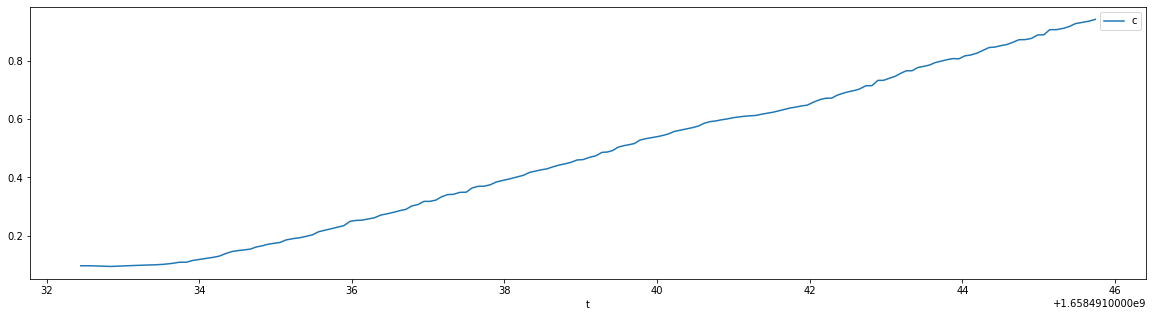

In [10]:
array =[]
for i in range(len(key_array)):
    t=key_array[i][28][3]
    c=center(i)
    array.append([c])
    array[i].append(t)
array = np.array(array)
df = pd.DataFrame(array,columns=['c','t'])
print(df)

df.plot(x ='t', y='c', kind = 'line',figsize=(20,5))
plt.show()

In [11]:
if plus==1:
    df_plus=df
elif minus==1:
    df_minus=df
    
print(df_minus)
    
    
return_points=[0,len(df)-1]
time_return_points=pd.DataFrame(df.t[return_points],columns=['t']).reset_index()

            c             t
0    0.095911  1.658491e+09
1    0.095847  1.658491e+09
2    0.094963  1.658491e+09
3    0.093975  1.658491e+09
4    0.093633  1.658491e+09
..        ...           ...
161  0.919218  1.658491e+09
162  0.928849  1.658491e+09
163  0.933225  1.658491e+09
164  0.937266  1.658491e+09
165  0.943384  1.658491e+09

[166 rows x 2 columns]


## Ss1- Lengths of lower body

            r         l    center  leg_ratio             t  velocity
0    1.566879  1.553522  0.099448   1.074666  1.658491e+09  0.012768
1    1.581289  1.540253  0.100952   1.108230  1.658491e+09  0.015675
2    1.563099  1.550487  0.103829   1.110535  1.658491e+09  0.048317
3    1.538465  1.543600  0.108087   1.104519  1.658491e+09  0.005824
4    1.542906  1.560410  0.108114   1.100767  1.658491e+09  0.034702
..        ...       ...       ...        ...           ...       ...
151  1.528442  1.519290  0.919218   0.987202  1.658491e+09  0.110659
152  1.554783  1.464861  0.928849   0.975158  1.658491e+09  0.101885
153  1.576884  1.433280  0.933225   0.978353  1.658491e+09  0.023407
154  1.621365  1.450671  0.937266   0.981215  1.658491e+09  0.074828
155  1.670285  1.469849  0.943384   1.016498  1.658491e+09  0.051526

[156 rows x 6 columns]
     index         r         l    center  leg_ratio             t  velocity  \
0        0  1.566879  1.553522  0.099448   1.074666  1.658491e+09  0.

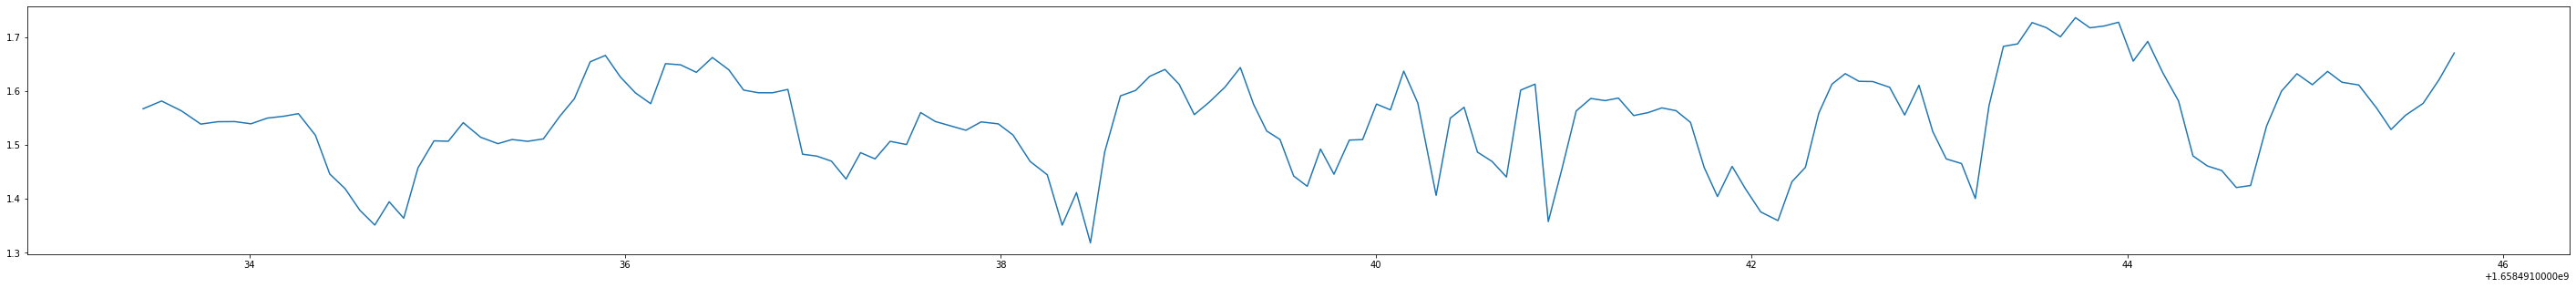

In [14]:
lb=[]
for i in range(len(key_array)):
    t=key_array[i][11][3] 
    r=(thigh_r(i)+shank_r(i)+ankle_to_heel_r(i))/ubl(i)
    l=(thigh_l(i)+shank_l(i)+ankle_to_heel_l(i))/ubl(i)
    leg_ratio=thigh_r(i)/thigh_l(i)
    c= center(i)
    lb.append([r])
    lb[i].append(l)
    lb[i].append(c)
    lb[i].append(leg_ratio)
    lb[i].append(t)
    lb[i].append(diffspl(t))
ratio_ub_lb=np.array(lb) 
df_lb = pd.DataFrame(ratio_ub_lb[10:],columns=['r','l','center','leg_ratio','t','velocity'])
print(df_lb)

if plus==1:
    df_plus=df_lb
    df_plus['foot_left_plus']=df_plus['l']/df_plus['leg_ratio']
    df_plus =df_plus.reset_index()
    plt.figure(figsize=(50,5))
    plt.plot(df_plus.t,df_plus.r)
    print(df_plus)
    
    plus_instants=sample(df_plus,df_plus.r,time_return_points)
    print(plus_instants)
    
    positive_lb_avrg=avrg_value(plus_instants,0.3,0.90)
    print(positive_lb_avrg)
    
    lbl_plus_L=list((map(lambda a : np.mean(a), positive_lb_avrg)))
    print(lbl_plus_L)
    
    S1=lbl_plus_L

    
if minus==1:
    df_minus=df_lb
    df_minus['foot_right_minus']=df_minus['r']*df_minus['leg_ratio']
    df_minus=df_minus.reset_index()
    plt.figure(figsize=(50,5))
    plt.plot(df_minus.t,df_minus.r)
    print(df_minus)
    
    minus_instants=sample(df_minus,df_minus.foot_right_minus ,time_return_points)
    print(minus_instants)
    
    negative_lb_avrg=avrg_value(minus_instants,0.3,0.90)
    print (negative_lb_avrg)
    
    lbl_minus_L=list((map(lambda a : np.mean(a),negative_lb_avrg)))
    print(lbl_minus_L)

    S1=lbl_minus_L

print (S1)
print (len(S1))
S_s[0][0]=S1



## Ss2-Length of upper arm

---



Right Hand

            r         l         c             t  velocity
0    0.661026  0.518100  0.095911  1.658491e+09  0.001651
1    0.640142  0.450050  0.095847  1.658491e+09 -0.006006
2    0.610597  0.403276  0.094963  1.658491e+09 -0.012967
3    0.600841  0.395266  0.093975  1.658491e+09 -0.010642
4    0.599664  0.347305  0.093633  1.658491e+09  0.004063
..        ...       ...       ...           ...       ...
161  0.582010  0.570319  0.919218  1.658491e+09  0.110659
162  0.594616  0.580918  0.928849  1.658491e+09  0.101885
163  0.595168  0.593313  0.933225  1.658491e+09  0.023407
164  0.604229  0.596232  0.937266  1.658491e+09  0.074828
165  0.609918  0.595464  0.943384  1.658491e+09  0.051526

[166 rows x 5 columns]


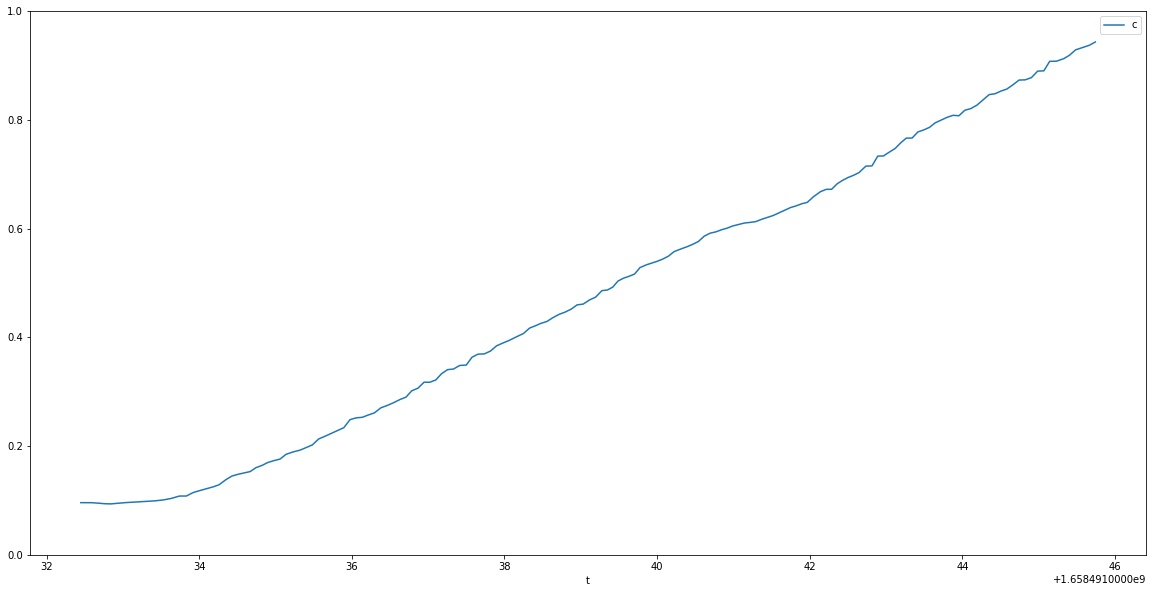

   index         r         l         c             t  velocity
0      1  0.640142  0.450050  0.095847  1.658491e+09 -0.006006
1      2  0.610597  0.403276  0.094963  1.658491e+09 -0.012967
2      3  0.600841  0.395266  0.093975  1.658491e+09 -0.010642
3     41  0.582444  0.545008  0.251901  1.658491e+09 -0.008902
4     53  0.560486  0.539120  0.317465  1.658491e+09 -0.017716
5    142  0.611173  0.578762  0.808489  1.658491e+09 -0.012125
6    154  0.572428  0.546459  0.873695  1.658491e+09 -0.015939
7    159  0.605947  0.611576  0.908085  1.658491e+09 -0.035650
[[0.6401419573575318, 0.6105971229577912, 0.6008406219156496, 0.5824444695289709, 0.560485893730729, 0.6111727963142606, 0.5724281093940603, 0.6059471942817254]]
[nan]
[nan]
[[[1.675896216268073]], [[nan], None], [None, None], [None, None], [None, None], [None, None], [None, None]]
1


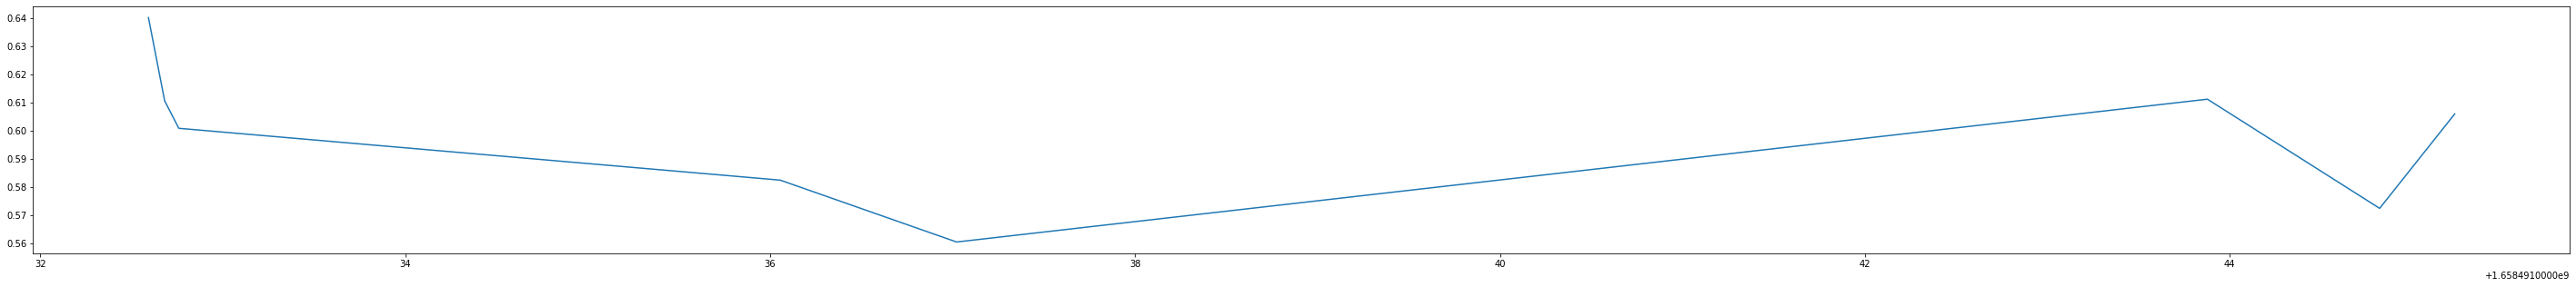

In [15]:
u_arm=[]
for i in range(len(key_array)):
    t=key_array[i][12][3]
    c= center(i)
    l_urm_r=upper_arm_r(i)/ubl(i)
    l_urm_l=upper_arm_l(i)/ubl(i)
    u_arm.append([l_urm_r])
    u_arm[i].append(l_urm_l)
    u_arm[i].append(c)
    u_arm[i].append(t)
    u_arm[i].append(diffspl(t))
u_arm= np.array(u_arm)
df_urm = pd.DataFrame(u_arm,columns=['r','l','c','t','velocity'])
print(df_urm)
df.plot(x ='t' ,kind = 'line',figsize=(20,10))
plt.ylim(0,1)
plt.show()

if plus==1:
    
    df_plus=df_urm
    df_plus =df_plus.reset_index()
    plt.figure(figsize=(50,5))
    plt.plot(df_plus.t,df_plus.r)
    print(df_plus)

    plus_instants=sample(df_plus,df_plus.r,time_return_points)
    print(plus_instants)

    plus_instants=avrg_value(plus_instants,0.3,0.95)
    print(plus_instants)
    
    S2=plus_instants

if minus==1:
    df_minus=df_urm[df_urm.velocity < 0]
    #df_minus.loc[:,'right'] *= -1
    #df_minus.loc[:,'left'] *= -1

    df_minus=df_minus.reset_index()
    plt.figure(figsize=(50,5))
    plt.plot(df_minus.t,df_minus.r)
    print(df_minus)


    minus_instants=sample(df_minus,df_minus.r,time_return_points)
    print(minus_instants)
    
    minus_instants=list((map(lambda a : np.nan,minus_instants)))
    print(minus_instants)
    
    S2=minus_instants


print(S2)
S_s[1][0]=S2
print (S_s)
print (len(S2))

ss3-lenght_of_upper_arm_lefthand

In [16]:
if plus==1:
    plus_instants=sample(df_plus,df_plus.l,time_return_points)
    plus_instants=list((map(lambda a : np.nan, plus_instants)))
    print(plus_instants)
    S3=plus_instants
    
if minus==1: 
    minus_instants=sample(df_minus,df_minus.l,time_return_points)
    print(minus_instants)
    minus_instants=avrg_value(minus_instants,0.3,0.90)
    print(minus_instants)
    minus_instants=list((map(lambda a : np.mean(a),minus_instants)))
    print(minus_instants)
    S3=minus_instants

print(S3)
S_s[1][1]=S3
print (S_s)
print (len(S3))

[[0.4500503003838408, 0.40327608473604565, 0.39526628371508155, 0.545008328373349, 0.5391200048222853, 0.578762041171909, 0.5464585503566602, 0.6115757777418598]]
[0.5523372311810509]
[0.5523372311810509]
[0.5523372311810509]
[[[1.675896216268073]], [[nan], [0.5523372311810509]], [None, None], [None, None], [None, None], [None, None], [None, None]]
1


## Ss4-Length of lower arm (Right Hand)

            r         l         c             t  velocity
0    0.543563  0.365592  0.138348  1.658491e+09  0.108572
1    0.534613  0.459712  0.144820  1.658491e+09  0.057176
2    0.526621  0.477672  0.148103  1.658491e+09  0.036060
3    0.540928  0.470073  0.150625  1.658491e+09  0.019183
4    0.538152  0.467029  0.153096  1.658491e+09  0.071051
..        ...       ...       ...           ...       ...
141  0.562826  0.471129  0.919218  1.658491e+09  0.110659
142  0.551961  0.473321  0.928849  1.658491e+09  0.101885
143  0.559024  0.471363  0.933225  1.658491e+09  0.023407
144  0.563956  0.475686  0.937266  1.658491e+09  0.074828
145  0.550509  0.407181  0.943384  1.658491e+09  0.051526

[146 rows x 5 columns]


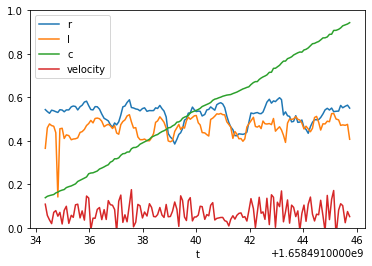

     index         r         l         c             t  velocity
0        0  0.543563  0.365592  0.138348  1.658491e+09  0.108572
1        1  0.534613  0.459712  0.144820  1.658491e+09  0.057176
2        2  0.526621  0.477672  0.148103  1.658491e+09  0.036060
3        3  0.540928  0.470073  0.150625  1.658491e+09  0.019183
4        4  0.538152  0.467029  0.153096  1.658491e+09  0.071051
..     ...       ...       ...       ...           ...       ...
141    141  0.562826  0.471129  0.919218  1.658491e+09  0.110659
142    142  0.551961  0.473321  0.928849  1.658491e+09  0.101885
143    143  0.559024  0.471363  0.933225  1.658491e+09  0.023407
144    144  0.563956  0.475686  0.937266  1.658491e+09  0.074828
145    145  0.550509  0.407181  0.943384  1.658491e+09  0.051526

[146 rows x 6 columns]


NameError: name 'plus_larm_avrg' is not defined

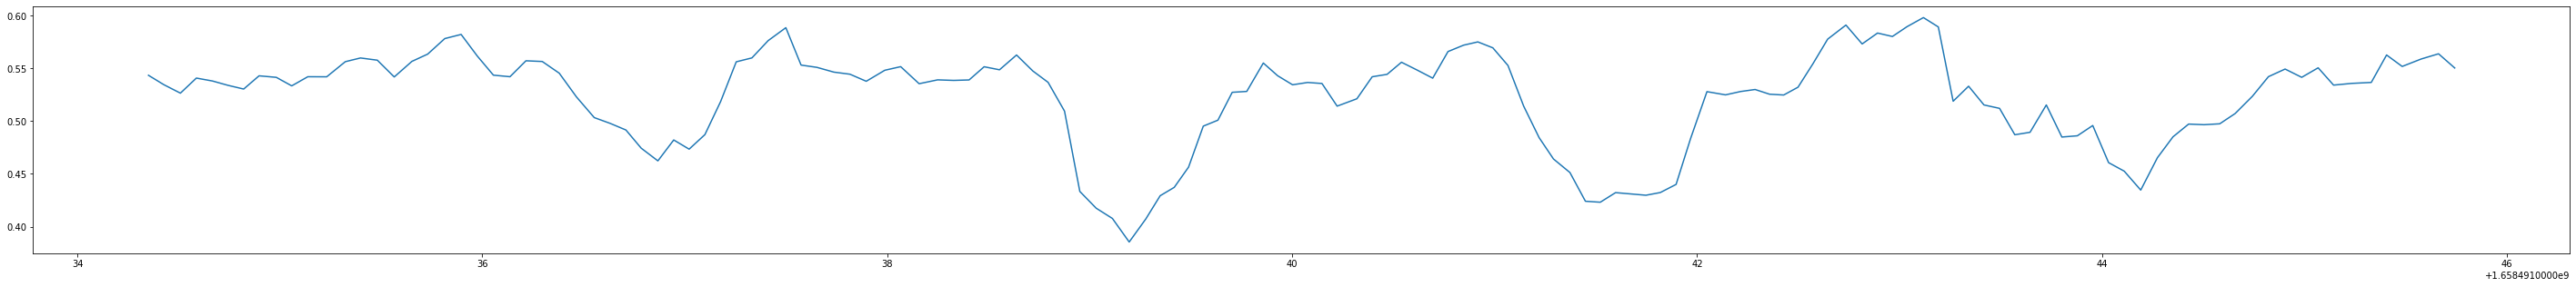

In [20]:
l_arm=[]
for i in range(len(key_array)):
    t=key_array[i][14][3]
    c= center(i)
    la_r=lower_arm_r(i)/ubl(i)
    la_l=lower_arm_l(i)/ubl(i)
    l_arm.append([la_r])
    l_arm[i].append(la_l)
    l_arm[i].append(c)
    l_arm[i].append(t)
    l_arm[i].append(diffspl(t))
lwr_arm= np.array(l_arm)
df_larm = pd.DataFrame(lwr_arm[20:],columns=['r','l','c','t','velocity'])
print(df_larm)
df_larm.plot(x ='t', kind = 'line')
plt.ylim(0,1)
plt.show()

if plus==1:

    df_plus=df_larm
    df_plus =df_plus.reset_index()
    plt.figure(figsize=(50,5))
    plt.plot(df_plus.t,df_plus.r)
    print(df_plus)
    
    plus_instants=sample(df_plus,df_plus.r,time_return_points)
    print(plus_instants)
    
    plus_larm_avrg=avrg_value(plus_instants,0.3,0.90)

    plus_instants=list((map(lambda a : np.mean(a), plus_larm_avrg)))
    print(plus_instants)
    
    S4=plus_instants

if minus==1:
    df_minus=df_larm
    df_minus=df_minus.reset_index()
    plt.figure(figsize=(50,5))
    plt.plot(df_minus.t,df_minus.r)
    print(df_minus)
    
    minus_instants=list((map(lambda a : np.nan,plus_larm_avrg)))
    print(minus_instants)

    S4=minus_instants

print(S4)
S_s[1][1]=S4
print (S_s)
print (len(S4))


## Ss5-Length of lower arm(left hand)

In [114]:


minus_instants=sample(df_minus,df_minus.l,time_return_points)
print(minus_instants)
minus_larm_avrg=avrg_value(minus_instants,0.3,0.90)
minus_larm_avrg=avrg_value(minus_instants,0.3,0.90)
print(minus_larm_avrg)

plus_instants=list((map(lambda a : np.nan, plus_larm_avrg[plus::2])))
minus_instants=list((map(lambda a : np.mean(a),minus_larm_avrg[minus::2])))
print(plus_instants)
print('\n')
print(minus_instants)

S5=comb_dir_arrays(plus_instants,minus_instants,plus,minus)
print(S5)
S_s[2][1]=S5
print (S_s)
print (len(S5))

[[0.46945843934094234, 0.47424655046145436, 0.4669654069232258], [0.4669654069232258, 0.45872205075117584, 0.46324238086196373, 0.4522424639530829, 0.46775956601787716, 0.4945397323139513, 0.5111774144421027, 0.5164421328637694, 0.4943723848162417, 0.47746462694660224, 0.48305339262644637, 0.4956834362957384, 0.498533997703397, 0.4990282823549941, 0.48959639301031316, 0.48727319702001587, 0.4928526340495733, 0.5036540229755663, 0.5246707974513112, 0.5226079542628947, 0.5260963224867155, 0.5045630920776428, 0.4974111174774269, 0.49718731729789534, 0.499245191360539, 0.48076177506473605, 0.45623576785681547, 0.43764133417923995, 0.3819534154377646, 0.3813208777090709, 0.3906532352074526, 0.3791350471431063, 0.380277993918203, 0.38635327939310066, 0.40506945042119674, 0.4266994696445735, 0.44184784535297045, 0.4709534145313956, 0.49056146306622467, 0.5029019782507588, 0.5310886407095664, 0.515329986360501, 0.5265642227598137, 0.5280935332142982, 0.5347882971051239, 0.5339768616260694, 0.5

## Ss6-Length of arm(Right)
### (Upper arm + lower arm + palm to finger)


              c            t  velocity
0      0.874583     0.460952 -0.002617
1      0.874646     0.566355  0.000723
2      0.874471     0.655099 -0.005032
3      0.873783     0.750068 -0.008217
4      0.873135     0.835765 -0.006633
...         ...          ...       ...
17728  0.781146  1965.889503  0.008195
17729  0.781704  1965.989895  0.002501
17730  0.781902  1966.100260  0.003561
17731  0.782452  1966.196103  0.006052
17732  0.782313  1966.291409 -0.014929

[17733 rows x 3 columns]


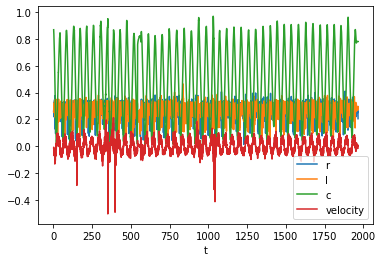

      index         r         l         c            t  velocity
0       149  0.223551  0.273289  0.071601    16.620986  0.020953
1       150  0.234908  0.266283  0.074313    16.729020  0.001666
2       171  0.317815  0.149657  0.016659    18.993104  0.004038
3       174  0.300933  0.114403  0.016176    19.326969  0.002336
4       176  0.303430  0.259361  0.015844    19.546885  0.007627
...     ...       ...       ...       ...          ...       ...
8553  17717  0.257988  0.282454  0.780432  1965.789542  0.003607
8554  17718  0.255765  0.285750  0.781146  1965.889503  0.008195
8555  17719  0.235574  0.295141  0.781704  1965.989895  0.002501
8556  17720  0.235004  0.297158  0.781902  1966.100260  0.003561
8557  17721  0.209761  0.286422  0.782452  1966.196103  0.006052

[8558 rows x 6 columns]
      index         r         l         c            t  velocity
0         0  0.266018  0.257256  0.869651     1.377138 -0.013763
1         1  0.244601  0.253722  0.868097     1.464923 -0.019852


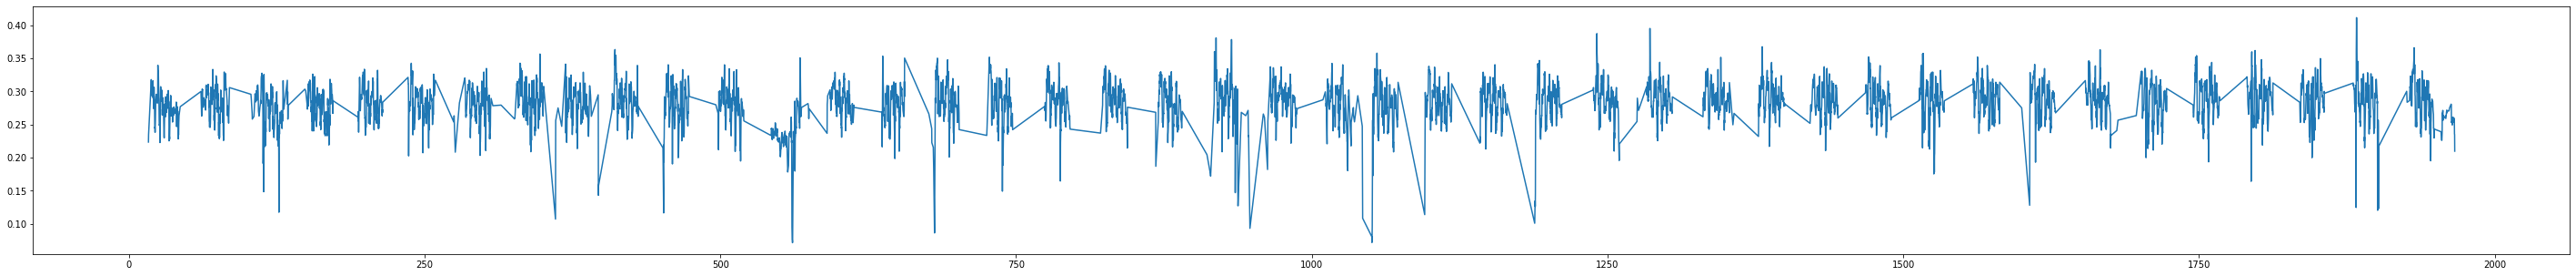

In [115]:
Length_of_arm=[]
for i in range(len(key_array)):
    t=key_array[i][12][3]
    l_r=upper_arm_r(i)+lower_arm_r(i)+palm_to_finger_r(i)/ubl(i)
    l_l=upper_arm_l(i)+lower_arm_l(i)+palm_to_finger_l(i)/ubl(i)
    c= center(i)
    Length_of_arm.append([l_r])
    Length_of_arm[i].append(l_l)
    Length_of_arm[i].append(c)
    Length_of_arm[i].append(t)
    Length_of_arm[i].append(diffspl(t))
Length_of_arm= np.array(Length_of_arm)
df_arm = pd.DataFrame(Length_of_arm[10:],columns=['r','l','c','t','velocity'])
print(df)
df_arm.plot(x ='t', kind = 'line')
plt.show()

df_plus=df_arm[df_arm.velocity > 0] 
df_minus=df_arm[df_arm.velocity < 0]
#df_minus.loc[:,'right'] *= -1
#df_minus.loc[:,'left'] *= -1
df_plus =df_plus.reset_index()
df_minus=df_minus.reset_index()
plt.figure(figsize=(50,5))
plt.plot(df_plus.t,df_plus.r)
#plt.plot(df_plus.t,df_plus.left)
print(df_plus)
print(df_minus)

plus_instants=sample(df_plus,df_plus.r,time_return_points)
print(plus_instants)
plus_arm_avrg_r=avrg_value(plus_instants,0.3,0.90)
print(plus_arm_avrg_r)

plus_instants= plus_arm_avrg_r[0::2]
minus_instants=list((map(lambda a : np.nan,plus_arm_avrg_r[minus::2])))
print(plus_instants)
print('\n')
print(minus_instants)

Ss6=comb_dir_arrays(plus_instants,minus_instants,plus,minus)
print(Ss6)
S_s[3][0]=Ss6
print (S_s)
print (len(Ss6))


Length of arm (left)


In [116]:
minus_instants=sample(df_minus,df_minus.l,time_return_points)
print(minus_instants)
minus_arm_avrg_l=avrg_value(minus_instants,0.3,0.90)
print(minus_arm_avrg_l)

plus_instants=list((map(lambda a : np.nan, plus_instants[plus::2])))
minus_instants=list((map(lambda a : np.mean(a),minus_arm_avrg_l[minus::2])))
print(plus_instants)
print('\n')
print(minus_instants)

Ss7=comb_dir_arrays(plus_instants,minus_instants,plus,minus)
print(Ss7)
S_s[3][1]=Ss7
print (S_s)
print (len(Ss7))

[[0.27569198094749237, 0.2640942180675543, 0.28205375084650697], [0.28205375084650697, 0.27591180958986605, 0.26922640217159377, 0.26753984751517834, 0.25932055194037534, 0.2901940061023677, 0.29072618079956813, 0.28549717517187034, 0.28619711357908034, 0.27849410856512435, 0.2850329368401968, 0.2860834826315469, 0.30405971072977483, 0.3032847807707849, 0.29689022210213956, 0.29809212676705044, 0.2919239873504672, 0.28976673765203964, 0.2952027552812556, 0.2973993093792177, 0.2958257864496845, 0.2946775256264673, 0.2880730973316288, 0.2887176045778798, 0.2800001765204677, 0.26507165968815105, 0.27063766885261564, 0.27368473972881896, 0.273542547778637, 0.2666806106523917, 0.26621804229080814, 0.2661917764804122, 0.26056949617366776, 0.2694391873050401, 0.27745877373774613, 0.2822110847734103, 0.2901965668856935, 0.2916520037408711, 0.2942687700052523, 0.29742700670822886, 0.2975162444889028, 0.30917424585042924, 0.32476473179960014, 0.3275715265133107, 0.33573006269686784, 0.3272955723

## Ss8-Length of thigh(Right)

              r         l  leg_ratio         c            t  velocity
0      0.636296  0.686114   0.916025  0.869651     1.377138 -0.013763
1      0.666258  0.708098   0.922078  0.868097     1.464923 -0.019852
2      0.686042  0.720254   0.908291  0.866454     1.550370 -0.017959
3      0.727336  0.737292   0.882757  0.864898     1.648689 -0.013530
4      0.754261  0.770746   0.900629  0.863949     1.737082 -0.007804
...         ...       ...        ...       ...          ...       ...
17718  0.655881  0.643314   1.005609  0.781146  1965.889503  0.008195
17719  0.659086  0.652014   1.003014  0.781704  1965.989895  0.002501
17720  0.659204  0.652924   0.998524  0.781902  1966.100260  0.003561
17721  0.655501  0.652486   0.992805  0.782452  1966.196103  0.006052
17722  0.654428  0.649597   0.987571  0.782313  1966.291409 -0.014929

[17723 rows x 6 columns]


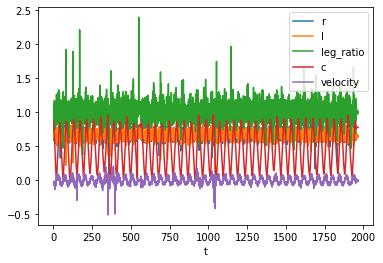

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


      index         r         l  leg_ratio         c            t  velocity  \
0       149  0.626791  0.657538   1.107340  0.071601    16.620986  0.020953   
1       150  0.602704  0.623827   0.957278  0.074313    16.729020  0.001666   
2       171  0.754696  0.775743   0.961891  0.016659    18.993104  0.004038   
3       174  0.691649  0.720755   1.130800  0.016176    19.326969  0.002336   
4       176  0.717446  0.673944   1.265264  0.015844    19.546885  0.007627   
...     ...       ...       ...        ...       ...          ...       ...   
8553  17717  0.660309  0.652674   1.014740  0.780432  1965.789542  0.003607   
8554  17718  0.655881  0.643314   1.005609  0.781146  1965.889503  0.008195   
8555  17719  0.659086  0.652014   1.003014  0.781704  1965.989895  0.002501   
8556  17720  0.659204  0.652924   0.998524  0.781902  1966.100260  0.003561   
8557  17721  0.655501  0.652486   0.992805  0.782452  1966.196103  0.006052   

      foot_left_plus  
0           0.593800  
1    

In [117]:
th_r=[]
for i in range(len(key_array)):
    t=key_array[i][24][3]
    r=thigh_r(i)/ubl(i)
    l=thigh_l(i)/ubl(i)
    c= center(i)
    leg_ratio=shank_r(i)/shank_l(i)
    th_r.append([r])
    th_r[i].append(l)
    th_r[i].append(leg_ratio)
    th_r[i].append(c)
    th_r[i].append(t)
    th_r[i].append(diffspl(t))
th_r= np.array(th_r)
df_thigh = pd.DataFrame(th_r[10:],columns=['r','l','leg_ratio','c','t','velocity'])
print(df_thigh)
df_thigh.plot(x ='t', kind = 'line')
plt.show()

df_plus=df_thigh[df_thigh.velocity > 0] 
df_minus=df_thigh[df_thigh.velocity < 0]
df_minus['foot_right_minus']=df_minus['r']*df_minus['leg_ratio']
df_plus['foot_left_plus']=df_plus['l']/df_plus['leg_ratio']
df_plus =df_plus.reset_index()
df_minus=df_minus.reset_index()
print(df_plus)
print(df_minus)

plus_instants=sample(df_plus,df_plus.r ,time_return_points)
minus_instants=sample(df_minus,df_minus.foot_right_minus,time_return_points)
plus_thigh_avrg_r=avrg_value(plus_instants,0.3,0.90)
minus_thigh_avrg_r=avrg_value(minus_instants,0.3,0.90)
print(plus_thigh_avrg_r)
print(minus_thigh_avrg_r)

plus_instants=list((map(lambda a : np.mean(a), plus_thigh_avrg_r[plus::2])))
minus_instants=list((map(lambda a : np.mean(a),minus_thigh_avrg_r[minus::2])))
print(plus_instants)
print('\n')
print(minus_instants)

Ss8=comb_dir_arrays(plus_instants,minus_instants,plus,minus)
print(Ss8)
S_s[4][0]=Ss8
print (S_s)
print (len(Ss8))



## Ss9-Length of thigh(left)

In [118]:
plus_instants=sample(df_plus,df_plus.foot_left_plus,time_return_points)
minus_instants=sample(df_minus,df_minus.l,time_return_points)
minus_thigh_avrg_l=avrg_value(minus_instants,0.3,0.90)
plus_thigh_avrg_l=avrg_value(plus_instants,0.3,0.90)
print(minus_thigh_avrg_l)
print(plus_thigh_avrg_l)

plus_instants=list((map(lambda a : np.mean(a), plus_thigh_avrg_l[plus::2])))
minus_instants=list((map(lambda a : np.mean(a),minus_thigh_avrg_l[minus::2])))
print(plus_instants)
print('\n')
print(minus_instants)

Ss9=comb_dir_arrays(plus_instants,minus_instants,minus,plus)
print(Ss9)
S_s[4][1]=Ss9
print (len(Ss9))
print (S_s)

[0.7072008948820838, 0.6989116653538733, 0.6619885766220679, 0.6906358156010319, 0.6898056513269578, 0.6928743978226026, 0.6882010919373225, 0.6977844780465294, 0.6915764414720831, 0.6984846931897454, nan, 0.6984077137295028, 0.6682163239956602, 0.6923013776654672, 0.6868754006675165, 0.6763361857500857, 0.6880011460645581, 0.6955525551967805, 0.7056822235479974, 0.6905448552788294, nan, 0.6901053382534665, 0.6895850999282256, 0.687416541735919, 0.7483923714686077, 0.6800417913147517, nan, 0.6892880842200744, 0.6176893653799103, 0.6964204333096603, 0.7115486366746089, 0.6934358397579374, nan, 0.6885990456425114, 0.6708987767364273, 0.6972808239239205, nan, 0.6909422725734018, 0.6935047832590563, 0.6932180590802359, 0.7367900320974825, 0.684788100022453, 0.7151961205236208, 0.6926015245625955, nan, 0.693720322379989, nan, 0.6950169410781531, 0.6963566146199099, 0.6842914928166731, nan, 0.6803302435055698, 0.6263250068258449, 0.7055913255471145, 0.7065938430923233, 0.6939491396818463, 0.

## Ss10-Length of shank(right)

              r         l  leg_ratio         c            t  velocity
0      0.609451  0.694788   1.020680  0.874583     0.460952 -0.002617
1      0.637354  0.709995   1.008540  0.874646     0.566355  0.000723
2      0.665429  0.717260   1.006750  0.874471     0.655099 -0.005032
3      0.685240  0.735643   0.999302  0.873783     0.750068 -0.008217
4      0.690143  0.739150   0.994876  0.873135     0.835765 -0.006633
...         ...       ...        ...       ...          ...       ...
17728  0.677757  0.673977   1.019534  0.781146  1965.889503  0.008195
17729  0.678086  0.676048   1.010847  0.781704  1965.989895  0.002501
17730  0.675669  0.676668   1.009617  0.781902  1966.100260  0.003561
17731  0.671803  0.676672   1.004622  0.782452  1966.196103  0.006052
17732  0.667525  0.675926   1.007437  0.782313  1966.291409 -0.014929

[17733 rows x 6 columns]


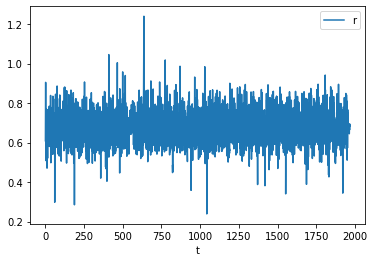

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


      index         r         l  leg_ratio         c            t  velocity  \
0         1  0.637354  0.709995   1.008540  0.874646     0.566355  0.000723   
1       159  0.660233  0.596233   0.953239  0.071601    16.620986  0.020953   
2       160  0.594198  0.620717   0.966139  0.074313    16.729020  0.001666   
3       181  0.738405  0.767660   0.972868  0.016659    18.993104  0.004038   
4       184  0.691785  0.611766   0.959618  0.016176    19.326969  0.002336   
...     ...       ...       ...        ...       ...          ...       ...   
8554  17727  0.689664  0.679646   1.011698  0.780432  1965.789542  0.003607   
8555  17728  0.677757  0.673977   1.019534  0.781146  1965.889503  0.008195   
8556  17729  0.678086  0.676048   1.010847  0.781704  1965.989895  0.002501   
8557  17730  0.675669  0.676668   1.009617  0.781902  1966.100260  0.003561   
8558  17731  0.671803  0.676672   1.004622  0.782452  1966.196103  0.006052   

      foot_left_plus  
0           0.716058  
1    

In [119]:
shk=[]
for i in range(len(key_array)):
    t=key_array[i][26][3]
    r=shank_r(i)/ubl(i)
    l=shank_l(i)/ubl(i)
    c= center(i)
    leg_ratio=thigh_r(i)/thigh_l(i)
    shk.append([r])
    shk[i].append(l)
    shk[i].append(leg_ratio)
    shk[i].append(c)
    shk[i].append(t)
    shk[i].append(diffspl(t))
shk= np.array(shk)
df_shank = pd.DataFrame(shk,columns=['r','l','leg_ratio','c','t','velocity'])
print(df_shank)
df_shank.plot(x ='t',y='r' )
plt.show()

df_plus=df_shank[df_shank.velocity > 0] 
df_minus=df_shank[df_shank.velocity < 0]
df_minus['foot_right_minus']=df_minus['r']/df_minus['leg_ratio']
df_plus['foot_left_plus']=df_plus['l']*df_plus['leg_ratio']
df_plus =df_plus.reset_index()
df_minus=df_minus.reset_index()
print(df_plus)
print(df_minus)

plus_instants=sample(df_plus,df_plus.r,time_return_points)
minus_instants=sample(df_minus,df_minus.foot_right_minus ,time_return_points)
plus_shank_avrg_r=avrg_value(plus_instants,0.2,0.90)
minus_shank_avrg_r=avrg_value(minus_instants,0.2,0.90)
print(plus_shank_avrg_r)
print(minus_shank_avrg_r)

plus_instants=list((map(lambda a : np.mean(a), plus_shank_avrg_r[plus::2])))
minus_instants=list((map(lambda a : np.mean(a),minus_shank_avrg_r[minus::2])))
print(plus_instants)
print('\n')
print(minus_instants)

Ss10=comb_dir_arrays(plus_instants,minus_instants,plus,minus)
print(Ss10)
S_s[5][0]=Ss10
print (S_s)
print (len(Ss10))

## Ss11-Length of shank(Left)

In [120]:
plus_instants=sample(df_plus,df_plus.l,time_return_points)
minus_instants=sample(df_minus,df_minus.l,time_return_points)
minus_shank_avrg_l=avrg_value(minus_instants,0.2,0.90)
plus_shank_avrg_l=avrg_value(plus_instants,0.2,0.90)
print(minus_shank_avrg_l)
print(plus_shank_avrg_l)

plus_instants=list((map(lambda a : np.mean(a), plus_shank_avrg_l[plus::2])))
minus_instants=list((map(lambda a : np.mean(a),minus_shank_avrg_l[minus::2])))
print(plus_instants)
print('\n')
print(minus_instants)

Ss11=comb_dir_arrays(plus_instants,minus_instants,minus,plus)
print(Ss11)
S_s[5][1]=Ss11
print (S_s)
print (len(Ss11))

[0.6785864061284503, 0.7093455814060711, 0.6283600628839104, 0.7187564588082368, 0.6944223518965854, 0.7256257371270055, 0.639988761904065, 0.7197138113378716, 0.6940488642547261, 0.7114441596740523, nan, 0.7035184638783372, 0.7228206022586091, 0.7153958945444726, 0.6906525333762216, 0.7001000458623955, 0.676683911732274, 0.7042681385330157, 0.6459449067836629, 0.7076532006569268, nan, 0.7117996915378966, 0.7182605865064269, 0.713934148009385, 0.6726510318445631, 0.6945522226069726, nan, 0.7159088482185741, 0.6492686764756681, 0.7034358321367521, 0.7030319020386401, 0.7041262466285627, nan, 0.721252757528448, 0.6748365144448663, 0.7207289817590088, nan, 0.7186177105414849, 0.6329105052314982, 0.7036747803315525, 0.639752519398357, 0.7081444055972822, 0.6888227199124725, 0.7016726595823294, nan, 0.7181287749429892, nan, 0.7140540233356725, 0.5599345283610482, 0.7118723140697504, nan, 0.7040807004655625, 0.6713216661502469, 0.7081194257631784, 0.7404744073401521, 0.7033564398313632, 0.62

## Ss12-Foot length (Right foot)


In [121]:
foot=[]
for i in range(len(key_array)):
    t=key_array[i][30][3]
    r=foot_length_r(i)/ubl(i)
    l=foot_length_l(i)/ubl(i)
    leg_ratio=thigh_r(i)/thigh_l(i)
    c= center(i)
    foot.append([r])
    foot[i].append(l)
    foot[i].append(leg_ratio)
    foot[i].append(c)
    foot[i].append(t)
    foot[i].append(diffspl(t))
foot= np.array(foot)
df_foot = pd.DataFrame(foot,columns=['r','l','leg_ratio','c','t','velocity'])
print(df_foot)
plt.show()

df_plus=df_foot[df_foot.velocity > 0] 
df_minus=df_foot[df_foot.velocity < 0]
df_minus['foot_right_minus']=df_minus['r']*df_minus['leg_ratio']
df_plus['foot_left_plus']=df_plus['l']/df_plus['leg_ratio']
df_plus =df_plus.reset_index()
df_minus=df_minus.reset_index()
print(df_plus)
print(df_minus)

plus_instants=sample(df_plus,df_plus.r,time_return_points)
minus_instants=sample(df_minus,df_minus.foot_right_minus ,time_return_points)
plus_foot_avrg_r=avrg_value(plus_instants,0.2,0.90)
minus_foot_avrg_r=avrg_value(minus_instants,0.2,0.90)
print(plus_foot_avrg_r)
print(minus_foot_avrg_r)

plus_instants=list((map(lambda a : np.mean(a), plus_foot_avrg_r[plus::2])))
minus_instants=list((map(lambda a : np.mean(a),minus_foot_avrg_r[minus::2])))
print(plus_instants)
print('\n')
print(minus_instants)

Ss12=comb_dir_arrays(plus_instants,minus_instants,plus,minus)
print(Ss12)
S_s[6][0]=Ss12
print (S_s)
print (len(Ss12))

              r         l  leg_ratio         c            t  velocity
0      0.212056  0.249011   1.020680  0.874583     0.460952 -0.002617
1      0.235726  0.254191   1.008540  0.874646     0.566355  0.000723
2      0.238113  0.256536   1.006750  0.874471     0.655099 -0.005032
3      0.246157  0.258713   0.999302  0.873783     0.750068 -0.008217
4      0.253943  0.269628   0.994876  0.873135     0.835765 -0.006633
...         ...       ...        ...       ...          ...       ...
17728  0.218449  0.308429   1.019534  0.781146  1965.889503  0.008195
17729  0.219187  0.299879   1.010847  0.781704  1965.989895  0.002501
17730  0.219041  0.293592   1.009617  0.781902  1966.100260  0.003561
17731  0.236353  0.289660   1.004622  0.782452  1966.196103  0.006052
17732  0.234514  0.286296   1.007437  0.782313  1966.291409 -0.014929

[17733 rows x 6 columns]
      index         r         l  leg_ratio         c            t  velocity  \
0         1  0.235726  0.254191   1.008540  0.874646   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[0.22927851779969322, 0.18029513409492443, 0.23396299032412965, 0.19674160609963184, 0.22544372257588696, 0.19963971428247718, 0.22433546699111623, nan, 0.2331946758070989, nan, 0.22370363055568918, 0.2080769208887866, 0.23665543119802254, 0.20621578946878627, 0.21193114208327865, 0.1867782239139385, 0.23917028991923703, 0.19024349302634982, 0.2351137578231624, 0.15789769427431505, 0.23935113155267002, 0.21163808374703996, 0.23332290202576447, nan, 0.1565414787803929, 0.25040204922239223, 0.23519647715554395, nan, 0.23809538031629374, 0.2028349116676811, 0.24797967885915903, 0.1752508379513721, 0.24178224536301499, nan, 0.23681859560263158, nan, 0.23665936103141832, 0.1846320064494117, 0.24154800818189698, 0.16191811867891226, 0.2378080981922443, 0.2075067526600928, 0.23549381011357237, 0.18221071746843828, 0.2380166522867017, 0.2229801128313293, 0.2428185390690674, nan, 0.23431552121212798, nan, 0.23458798979722034, nan, 0.23882676978448714, nan, 0.2440918264533922, 0.2498628983175228

## Ss13-Foot length (left foot)


In [122]:
plus_instants=sample(df_plus,df_plus.l,time_return_points)
minus_instants=sample(df_minus,df_minus.l,time_return_points)
minus_foot_avrg_l=avrg_value(minus_instants,0.2,0.90)
plus_foot_avrg_l=avrg_value(plus_instants,0.2,0.90)
print(minus_foot_avrg_l)
print(plus_foot_avrg_l)

plus_instants=list((map(lambda a : np.mean(a), plus_foot_avrg_l[plus::2])))
minus_instants=list((map(lambda a : np.mean(a),minus_foot_avrg_l[minus::2])))
print(plus_instants)
print('\n')
print(minus_instants)

Ss13=comb_dir_arrays(plus_instants,minus_instants,plus,minus)
print(Ss13)
S_s[6][1]=Ss13
print (S_s)
print (len(Ss13))

[0.1975493451895014, 0.22437318483628213, 0.20303658567946492, 0.2268535531697245, 0.22190597536416576, 0.22693539881666022, 0.1942188356638772, 0.22039963909847132, 0.19654510785988136, 0.23126673508474482, nan, 0.22479704299663453, 0.16702254213990284, 0.22699951517303404, 0.22497935478672793, 0.22541775613011397, 0.19933180384651214, 0.23348085164892168, 0.15557624922850527, 0.23010870369701222, nan, 0.229681534086934, 0.224094177885896, 0.23272058575185214, 0.16031016293015563, 0.2449416857779558, nan, 0.2277343377436504, 0.2177717970443263, 0.22638427636361044, 0.2123988733208706, 0.2365125276287083, nan, 0.23243267025211764, 0.20333399306115785, 0.23302274002467094, nan, 0.23146867554844647, 0.23698995680107476, 0.22806391033075774, 0.18380868288426122, 0.22241131493242874, 0.14269213720095275, 0.22597731648241276, nan, 0.21816686962788065, nan, 0.2292481585054288, 0.1707212681651296, 0.23121753400775252, nan, 0.23467135382291865, 0.1852825308104969, 0.2212166785887471, 0.1522173

##Save File

In [ ]:
output = open('para_values/{}.pkl'.format(name), 'wb')
pickle.dump(S_s, output)
output.close()